# Exploration 01 모두카페 데이터 분석 #
온라인 코어 2기 박수경


## 1. 데이터 불러오기 ###

In [1]:
# Pandas, Numpy, Matplotlib, Seaborn 호출
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

In [2]:
# 데이터 호출 및 info(), head()로 정보확인
entry_data = pd.read_csv('~/aiffel/Exploration/E01/data/entry_data.csv')
sales_data = pd.read_csv('~/aiffel/Exploration/E01/data/sales_data.csv')
item_data = pd.read_csv('~/aiffel/Exploration/E01/data/item_data.csv')
item_entry_data = pd.read_csv('~/aiffel/Exploration/E01/data/item_entry_data.csv')

In [3]:
entry_data.info()
entry_data.head()
sales_data.info()
sales_data.head()
item_data.info()
item_data.head()
item_entry_data.info()
item_entry_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    22292 non-null  object
 1   입실      22555 non-null  object
 2   퇴실      22555 non-null  object
 3   이용      22533 non-null  object
 4   위치      22555 non-null  object
 5   금액      22555 non-null  int64 
 6   구분      22555 non-null  object
 7   고객      22555 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   결제일시    7105 non-null   object
 1   판매위치    7105 non-null   object
 2   상품명     7105 non-null   object
 3   결제방식    7105 non-null   object
 4   비고      7105 non-null   object
 5   판매수량    7105 non-null   int64 
 6   결제금액    7105 non-null   object
 7   고객      6300 non-null   object
dtypes: int64(1)

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


## 2. 데이터의 특성 파악 ##


데이터를 pandas의 다양한 기능으로 살펴 보고 특징을 파악했습니다.  
간단하게 보이는 정도로만 전처리를 합니다.   
unique()로 요소들을 알아보고,   
모두카페의 운영 상황 및 개선점 파악에 도움이 되지 않는 특정 열을 제거합니다.   
(예 : entry_data의 '구분' : 모든 값이 '퇴실)

In [4]:
print(sales_data['판매수량'].unique()) #1,-1의 값만 가진다.
print(entry_data['구분'].unique()) #모든 데이더가 '퇴실' 이므로 비교할 데이터프레임에서 삭제.
entry_data = entry_data.drop(['구분'], axis=1)
print(entry_data)
print(entry_data['위치'].unique()) #선불기1,2와 카운터의 3곳에서 결제
entry_data['금액'].groupby([entry_data['위치']]).sum() #결제하는 위치
entry_data['이용'].head(10) #'이용'이 이용시간을 의미함을 알아냄.

[ 1 -1]
['퇴실']
               요금제명                입실                퇴실           이용    위치  \
0        시간요금제(1시간)  2022-04-01 23:39   2022-04-02 0:39   오전 1:00:00  선불기2   
1        시간요금제(1시간)  2022-04-01 23:39   2022-04-02 0:39   오전 1:00:00  선불기2   
2           무제한 입장권  2022-04-01 20:55  2022-04-01 21:41  오전 12:46:00  선불기2   
3           무제한 입장권  2022-04-01 20:55  2022-04-01 21:41  오전 12:46:00  선불기2   
4      한국대생 무제한 입장권  2022-04-01 19:54  2022-04-01 22:28   오전 2:33:00  선불기2   
...             ...               ...               ...          ...   ...   
22550         종일요금제  2021-02-17 13:09  2021-02-17 14:19   오전 1:10:00  선불기1   
22551         종일요금제  2021-02-17 13:09  2021-02-17 14:19   오전 1:10:00  선불기1   
22552         종일요금제  2021-02-17 13:06  2021-02-17 14:19   오전 1:13:00  선불기1   
22553         종일요금제  2021-02-17 13:06  2021-02-17 14:19   오전 1:13:00  선불기1   
22554         종일요금제  2021-02-17 12:58  2021-02-17 14:19   오전 1:21:00  선불기1   

         금액              고객  
0      3000  custo

0     오전 1:00:00
1     오전 1:00:00
2    오전 12:46:00
3    오전 12:46:00
4     오전 2:33:00
5     오전 2:33:00
6     오전 2:33:00
7     오전 2:56:00
8     오전 2:56:00
9     오전 2:56:00
Name: 이용, dtype: object

entry_data 데이터의 경우 고객의 입실,퇴실, 이용시간 등을 알려주는데   
**완전 중복**인 행들은 삭제를 하여 통계를 내어야 합니다.  
또한 **이용시간**은 시, 분 외에는 삭제해 의미가 있는 수치만 남겼습니다.  

----------------


In [5]:
tmp_entry = entry_data.drop_duplicates(ignore_index=True) #완전중복되는 행 삭제, 인덱스를 새로 부여.
#이용시간은 입실시간과 퇴실시간의 차이입니다. 하지만 데이터를 살펴보니 '오전'과 '오후'는 의미가 없음을 발견.
#이용시간의 초도 의미가 없어서(입실과 퇴실이 분까지만 찍힘) 슬라이싱을 했다.
tmp_entry['이용'] = entry_data['이용'].str[3:-3]
tmp_entry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19321 entries, 0 to 19320
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    19109 non-null  object
 1   입실      19321 non-null  object
 2   퇴실      19321 non-null  object
 3   이용      19299 non-null  object
 4   위치      19321 non-null  object
 5   금액      19321 non-null  int64 
 6   고객      19321 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


C:\Users\TAN\AppData\Local\Temp\ipykernel_12220\2301821968.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_entry['이용'] = entry_data['이용'].str[3:-3]


## 3. 월별 매출액 추세 

월별 결제 통계를 위해 새로운 열을 만듭니다.  
'date'라는 열은 결제 년월만 표시되도록 만들어줍니다.

In [6]:
# 원본 데이터를 보존하고, 가공할 tmp_sales 에 할당
tmp_sales = sales_data
tmp_sales['date'] = sales_data['결제일시'].str[:7] #결제 월만 표시하는 열을 만듭니다.
tmp_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   결제일시    7105 non-null   object
 1   판매위치    7105 non-null   object
 2   상품명     7105 non-null   object
 3   결제방식    7105 non-null   object
 4   비고      7105 non-null   object
 5   판매수량    7105 non-null   int64 
 6   결제금액    7105 non-null   object
 7   고객      6300 non-null   object
 8   date    7105 non-null   object
dtypes: int64(1), object(8)
memory usage: 499.7+ KB


tmp_sales의 결제금액란이 object로 되어 있어서 연산이 불가능함을 발견했습니다.  
그리고 각 데이터프레임 간 FK를 쉽게 잡을 수 있게   
tmp_sales의 '판매위치'를 tmp_entry의 '위치'와 같게,  
tmp_sales의 '결제금액'을 tmp_entry의 '금액'과 같게 칼럼명을 바꾸어 줍니다.

In [7]:

tmp_sales = tmp_sales.rename(columns={'판매위치' : '위치', '결제금액' : '금액'})
tmp_sales.head()

,결제일시,위치,상품명,결제방식,비고,판매수량,금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04


지금의 '금액'은 문자열로 인식되어 있습니다.  
금액을 연산할 수 있도록 중간의 쉼표를 지우고 astype으로 정수형으로 변경합니다. 

In [8]:
# salse_data의 결제금액에 포함된 쉼표(,) 지우기
tmp_sales['금액'] = tmp_sales['금액'].str.replace(',','')
tmp_sales.head()

,결제일시,위치,상품명,결제방식,비고,판매수량,금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04


In [9]:

tmp_sales['금액'] = tmp_sales['금액'].astype(int) #정수로 변환

tmp_sales의 '금액' 열의 값을 'date'기준으로 합해서 월의 총 판매액을 구합니다.  
가로축을 월, 세로축을 매출으로 하는 bar 그래프를 그려서 표시합니다.

In [10]:
tmp_payment = tmp_sales['금액'].groupby(tmp_sales['date']).sum()
tmp_payment

date
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: 금액, dtype: int32

### - 월별 매출 그래프

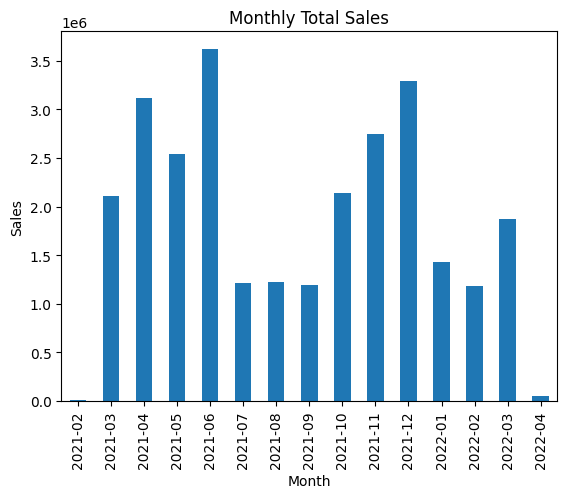

In [11]:
graph = tmp_payment.plot(kind='bar')
plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

월별 매출액의 추세를 확인할 수 있었습니다.  
원 데이터의 head()와 tail()으로 21년 2월과 22년 04월은 전 기간을 다루지 않으며,  
지나치게 짧은 기간이기 때문에 월 매출 분석에서 제외했습니다.  
매출은 21년 7, 8, 9월과 22년 1, 2월에서 눈에 띄게 낮아진 것을 볼 수 있습니다.   
최고 매출은 21년 6월, 최저 매출은 21년 9월입니다.  

--------------------------

## 4. 가장 인기있는 음식과 음료

매출에 어떤 품목이 영향을 많이 주고 있는지 알아보기 위해  
먼저 데이터의 구조를 살펴봅니다. 

In [12]:

tmp_sales.info()
print(tmp_sales['판매수량'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   결제일시    7105 non-null   object
 1   위치      7105 non-null   object
 2   상품명     7105 non-null   object
 3   결제방식    7105 non-null   object
 4   비고      7105 non-null   object
 5   판매수량    7105 non-null   int64 
 6   금액      7105 non-null   int32 
 7   고객      6300 non-null   object
 8   date    7105 non-null   object
dtypes: int32(1), int64(1), object(7)
memory usage: 471.9+ KB
[ 1 -1]


판매수량은 1 또는 -1로 기록되어, 동시에 다량의 상품을 구매하는 경우도 하나씩 표기되어 있습니다.  
이 데이터는 결제나 판매가 취소된 부분도 기록되어 있습니다.  
금액은 음수로 취소된 만큼이 기입되어 있는데,  
매출의 합계에 취소된 부분이 계산되어야 하므로 함께 합계하여 분석합니다.

In [13]:

tmp_sales['상품명'].value_counts() #  '상품명'을 기준으로 집계합니다.
print(tmp_sales['상품명'].value_counts().head(10))
print(tmp_sales['상품명'].value_counts().tail())

김치볶음밥         1211
라면             756
짜장라면           457
치즈불고기볶음밥       423
계란추가           315
아메리카노(ICE)     314
낙지볶음밥          314
새우볶음밥          311
치즈감자튀김         247
감자튀김           242
Name: 상품명, dtype: int64
녹차(HOT)         1
짜장라면(계란추가)      1
이어폰(커널형)        1
오늘은 한돈고추장불고기    1
오늘은 한돈간장불고기     1
Name: 상품명, dtype: int64


상품이 유효하게 팔린 개수(취소 항목 포함) 상위 10개, 하위 5개를 확인했습니다.  
가장 인기있는 음료와 음식을 따로 알아보기 위해   
tmp_sales에 상품명에 따른 분류 열을 추가해 보기로 했습니다.  

In [14]:
tmp_sales['상품명'].nunique()
print(tmp_sales['상품명'].nunique())
item_data['상품명'].nunique()
print(item_data['상품명'].nunique())
print(item_data['분류'].unique())

100
98
['게임&TV' '디저트' '따뜻한음료(커피외)' '스무디&쉐이크' '음식' '차가운음료(커피외)' '커피' '포장']


nunique()로 일단 데이터를 조사해보니 item_data와 일치하지 않아 조금 더 자세히 보기로 했습니다.  
item_data의 상품명에 따른 분류를 tmp_sales 끝에 붙여 표시합니다.  
nunique만으로도 상품명이 정확히 매치하지 않는다는 것을 알 수 있어서 isnull()을 이용해 자세히 살펴봅니다.  



In [15]:
prac = tmp_sales.set_index("상품명", inplace=False)
prac2 = item_data.set_index("상품명", inplace=False)
prac3 = pd.merge(prac, prac2['분류'],how='outer', on='상품명')
prac3['분류'].isnull().sum()
prac3['분류'][prac3['분류'].isnull()] #결측치가 있는 행을 찾기. #레퍼런스 https://doong-e.tistory.com/27

상품명
짜장라면(계란추가)     NaN
라면(계란/치즈추가)    NaN
Name: 분류, dtype: object

데이터의 보정을 위해 짜장라면에 계란추가 는 음식, 라면에 계란,치즈 추가한 것을  
음식으로 분류해 주었습니다.

In [16]:
prac3.loc['짜장라면(계란추가)','분류'] ='음식'
prac3.loc['라면(계란/치즈추가)','분류'] ='음식'
prac3['분류'][prac3['분류'].isnull()]

Series([], Name: 분류, dtype: object)

이제 모든 팔린 품목들을 음식과 음료로 나누어 분석할 수 있습니다.   
- 가장 판매수량이 많은 상품
- 가장 매출이 높은 상품
- 가장 판매수량이 많은 음식
- 가장 매출이 높은 음식
- 가장 판매수량이 많은 음료
- 가장 매출이 높은 음료
  
를 각각 알 수 있습니다.


In [17]:
food_category = ['음식', '디저트', '포장']
bev_category = ['음료', '따뜻한음료(커피외)', '스무디&쉐이크', '차가운음료(커피외)']

food_sale = prac3.loc[prac3['분류'].isin(food_category)] #음식 판매 필터링
food_ranks = food_sale['판매수량'].groupby(food_sale["분류"]).sum()

bev_sale= prac3.loc[prac3['분류'].isin(bev_category)] #음료 판매 필터링 #레퍼런스 https://sorting.tistory.com/16
bev_ranks = bev_sale['판매수량'].groupby(bev_sale["분류"]).sum()

팔린 수량으로 따져보면  
전체적으로 음식의 비중이 가장 높고, 음료 중에서는 차가운 음료가 높습니다.  

In [18]:
item_ranks_sum = tmp_sales['판매수량'].groupby(tmp_sales['상품명']).sum()
item_ranks = pd.DataFrame(item_ranks_sum)
print(prac3)
food_ranks = pd.DataFrame(food_ranks)
bev_ranks =  pd.DataFrame(bev_ranks)
item_ranks.sort_values(by='판매수량', ascending=False)
food_ranks.sort_values(by='판매수량', ascending=False)
bev_ranks.sort_values(by='판매수량', ascending=False)


                        결제일시    위치  결제방식    비고  판매수량    금액              고객  \
상품명                                                                          
치킨카라아케 6pc  2022-04-01 19:41  선불기1  신용카드  결제완료     1  4500  customer275507   
치킨카라아케 6pc  2022-03-31 14:51  선불기1  신용카드  결제완료     1  4500  customer751113   
치킨카라아케 6pc  2022-03-24 21:35  선불기1  신용카드  결제완료     1  4500  customer901892   
치킨카라아케 6pc  2022-03-12 17:42  선불기1  신용카드  결제완료     1  4500  customer339975   
치킨카라아케 6pc  2022-03-05 19:56  선불기1  신용카드  결제완료     1  4500  customer301352   
...                      ...   ...   ...   ...   ...   ...             ...   
2인라면        2021-04-08 18:05   카운터    현금  결제완료     1     0             NaN   
2인라면        2021-04-07 19:44   카운터    현금  결제완료     1     0             NaN   
2인라면        2021-04-07 19:44   카운터    현금  결제완료     1     0             NaN   
2인라면        2021-04-05 21:12   카운터    현금  결제완료     1     0             NaN   
2인라면        2021-04-05 13:17   카운터    현금  결제완료     1     0      

,판매수량
분류,
차가운음료(커피외),1082
스무디&쉐이크,284
따뜻한음료(커피외),105


각 항목의 판매량에 금액을 곱하여 항목당 매출을 계산합니다.   
그리고 음식/ 음료의 총 매출도 계산할 수 있습니다.  
다음으로 음식/ 음료의 매출 Top 5위와 전체 메뉴에서 Top 10을 선정한 목록을 출력해 봅니다.

### -분류별 매출 현황 정보

In [19]:

print('전체 매출 Top 10 ')
item_sale2 = prac3.reset_index()
item_total = item_sale2['금액'].groupby([item_sale2['상품명']]).sum()
print('============================================')
print(item_total.sort_values(ascending=False).head(10))
print('============================================')
print('총 매출 : ',food_sale['금액'].sum(), '원')
print('============================================')
food_sale2 = food_sale.reset_index()
food_total =food_sale2['금액'].groupby([food_sale2['상품명']]).sum()
print('음식 매출 Top 5 ')
print('============================================')
print(food_total.sort_values(ascending=False).head())
print('============================================')
print('음식의 총 매출 : ',food_sale['금액'].sum(), '원')
print('============================================')
print('음료 매출 Top 5 ')
bev_sale2 = bev_sale.reset_index()
bev_total =bev_sale2['금액'].groupby([bev_sale2['상품명']]).sum()
print('============================================')
print(bev_total.sort_values(ascending=False).head())
print('============================================')
print('음료의 총 매출 : ',bev_sale['금액'].sum(), '원')


전체 매출 Top 10 
상품명
김치볶음밥         35831400
라면            11664000
치즈불고기볶음밥      11380500
낙지볶음밥          6798800
새우볶음밥          6119200
짜장라면           6097500
아메리카노(ICE)     5616600
감자튀김           3251400
치즈감자튀김         2697400
만두라면           2049000
Name: 금액, dtype: int32
총 매출 :  90530600 원
음식 매출 Top 5 
상품명
김치볶음밥       35831400
라면          11664000
치즈불고기볶음밥    11380500
낙지볶음밥        6798800
새우볶음밥        6119200
Name: 금액, dtype: int32
음식의 총 매출 :  90530600 원
음료 매출 Top 5 
상품명
아이스티         1202400
레몬에이드         964400
초코라떼(ICE)     645300
청귤에이드         374000
딸기스무디         323600
Name: 금액, dtype: int32
음료의 총 매출 :  6324800 원


In [20]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정 

import matplotlib.font_manager as fm

fontpath = 'MaruBuri-Regular.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
title_font = fm.FontProperties(fname=fontpath, size=12)
plt.rc('font', family='MaruBuri')
mpl.font_manager.findfont(font)

print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())
print ('설정파일 위치: ', mpl.matplotlib_fname())


버전:  3.6.2
설치 위치:  c:\Users\TAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\TAN\.matplotlib
캐시 위치:  C:\Users\TAN\.matplotlib
설정파일 위치:  c:\Users\TAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [21]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# print(len(font_list)) 
font_list[:10] 
f = [f.name for f in fm.fontManager.ttflist]
# print(len(font_list))
# f[:5]
# [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Maru' in f.name]

분석한 데이터를 토대로 가장 인기있는 음식과 음료를 시각화합니다.  
판매상품명 - 분류 - 판매개수 - 매출액을 다 아우를 수 있게   
파이그래프와 바그래프를 사용해 보았습니다.  
*레퍼런스* :  
        https://zephyrus1111.tistory.com/15  
        https://wikidocs.net/92114


### 상품 분류에 따른 판매량과 매출 그래프

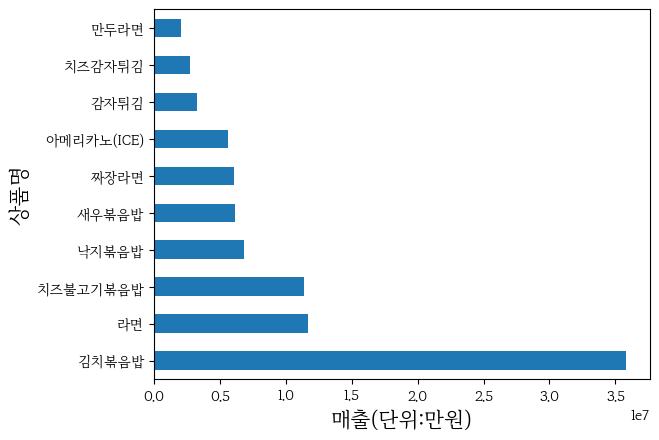

In [22]:
item_total.sort_values(ascending=False)[:10].plot.barh(x='상품명', y='금액', rot=0)
plt.ylabel('상품명', fontsize=15)
plt.xlabel('매출(단위:만원)', fontsize=15)

plt.show()

바 그래프로 전체 상품에서의 매출액 상위 열가지를 나타내었습니다.  
음료보다 음식의 매출이 대부분이므로, 비중이 얼마나 되는지 보기 위해  
파이그래프로 나타내었습니다.

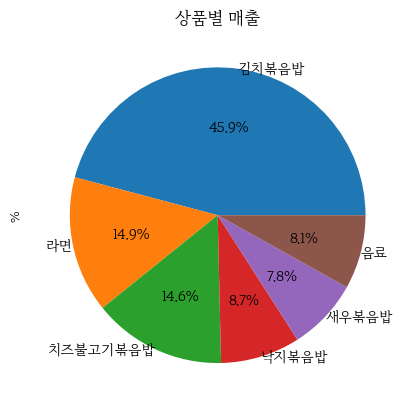

In [23]:
# 집계 결과를 시각화하기
pie = ["김치볶음밥", "라면", "치즈불고기볶음밥", "낙지볶음밥", '새우볶음밥','음료']
pie_values = [35831400, 11664000, 11380500, 6798800, 6119200, 6324800]
plt.pie(pie_values,labels=pie,labeldistance=1,autopct='%.1f%%')
# plt.legend(pie)
plt.ylabel('%',fontproperties=font)
plt.title('상품별 매출',fontproperties=title_font)
plt.show()

이는 판매량을 기준으로 한 그래프와 비교해 볼 수 있습니다.

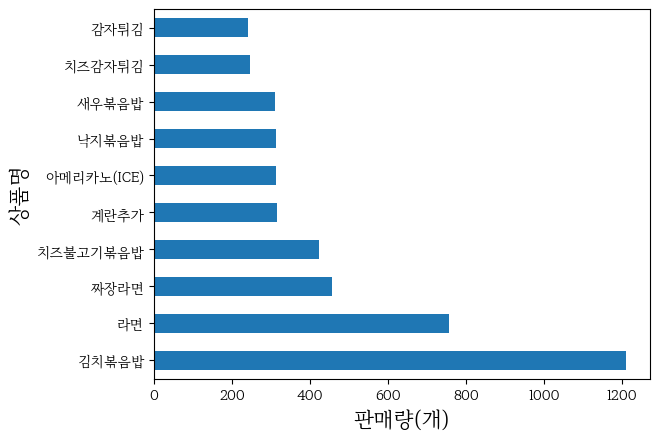

In [24]:

# tmp_sales.sort_values(by='판매수량', ascending=False)[:10].plot.barh(x='상품명', y='금액', rot=0)
# plt.ylabel('상품명', fontsize=15)
# plt.xlabel('매출(단위:만원)', fontsize=15)

# plt.show()

tmp_sales['상품명'].value_counts().head(10).plot.barh(x='상품명', y='금액', rot=0)
plt.ylabel('상품명', fontsize=15)
plt.xlabel('판매량(개)', fontsize=15)
plt.show()

#### 분석

- 김치볶음밥은 판매량과 매출이 모두 가장 높습니다.
- 그 뒤로 라면과이 뒤따릅니다.
- 음료의 매출은 음식의 매출보다 훨씬 낮습니다.
- 음료 중에서는 아이스 아메리카노가 판매량과 매출이 가장 높습니다.
---------------------------------------------

## 5. 가장 많이 팔린 입장권 종류

매출에 어떤 품목이 영향을 많이 주고 있는지 알아보기 위해  
먼저 데이터의 구조를 살펴봅니다.  
이전에 전처리를 해 두었던 tmp_entry를 사용합니다.

In [25]:
plan_total = tmp_entry['금액'].groupby(tmp_entry['요금제명']).sum().sort_values(ascending=False)
plan_total

요금제명
한국대생 입장권(종일권)      63143500
입장권(종일권)           20354500
심야-조조무제한(06시까지)     8795000
심야-조조무제한            4588000
한국대생 무제한 입장권        4316800
시간요금제(1시간)          1769500
시간요금제(3시간)          1343000
무제한 입장권             1288900
18시이후 무제한           1156000
조조무제한                620000
종일요금제                206500
1시간                   52500
시간 요금제(1시간당)          15000
3시간                   14000
시간요금제(1시간당)           12500
시간요금제                 12300
1시간 요금제               10000
무제한(한국대생)              7000
무제한(일반요금)              6000
시간권                       0
기간권                       0
이용권                       0
Name: 금액, dtype: int64

데이터 plan_total을 통해 사람들이 가장 많이 쓰는 요금제를 알 수 있습니다.  
그러나 요금제의 이름이 중복이 되거나 값이 비어있는 데이터도 있으므로  
item_entry_data의 항목들과 매칭이 어려운 문제점이 보입니다.

요금제 종류를 다시 정리할 필요를 느껴서  
item_entry_data과 plan_total의 원 데이터인 tmp_entry를 비교해 보았습니다.

In [26]:
item_entry_data.info()
print('=====================================')
print(item_entry_data['상품명'].unique())
print('=====================================')
print(tmp_entry['요금제명'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      34 non-null     int64 
 1   분류      34 non-null     object
 2   상품명     34 non-null     object
 3   판매금액    34 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.2+ KB
['한국대생 요금제' '심야-조조 요금제' '일반요금제' '거리두기4단계' '마감요금' '기본요금제' '추석당일 요금제']
['시간요금제(1시간)' '무제한 입장권' '한국대생 무제한 입장권' '기간권' '시간요금제(3시간)' '심야-조조무제한' '시간권'
 nan '입장권(종일권)' '한국대생 입장권(종일권)' '1시간' '조조무제한' '18시이후 무제한' '3시간'
 '심야-조조무제한(06시까지)' '이용권' '시간 요금제(1시간당)' '시간요금제(1시간당)' '무제한(한국대생)'
 '1시간 요금제' '무제한(일반요금)' '종일요금제' '시간요금제']


'시간요금제(1시간)', '시간 요금제(1시간당)', '시간요금제(1시간당)', '1시간', '1시간 요금제'는 병합하도록 합니다.  
'시간요금제(3시간)', '3시간' 또한 병합합니다.  
'심야-조조무제한', '심야-조조무제한(06시까지)', '18시이후 무제한'도 병합합니다.
나머지는 정확한 의미가 확인 불가능하므로 그대로 두고 분석을 계속합니다.

In [27]:
tmp_entry = tmp_entry.replace({'요금제명' : ['시간요금제(1시간)', '시간 요금제(1시간당)', '시간요금제(1시간당)', '1시간', '1시간 요금제']},'시간요금제(1시간)' )
tmp_entry = tmp_entry.replace({'요금제명' : ['시간요금제(3시간)', '3시간']},'시간요금제(3시간)' )
tmp_entry = tmp_entry.replace({'요금제명' : ['심야-조조무제한', '심야-조조무제한(06시까지)','18시이후 무제한']},'심야-조조무제한')
print(tmp_entry['요금제명'].unique())

['시간요금제(1시간)' '무제한 입장권' '한국대생 무제한 입장권' '기간권' '시간요금제(3시간)' '심야-조조무제한' '시간권'
 nan '입장권(종일권)' '한국대생 입장권(종일권)' '조조무제한' '이용권' '무제한(한국대생)' '무제한(일반요금)'
 '종일요금제' '시간요금제']


In [28]:
plan_total = tmp_entry['금액'].groupby(tmp_entry['요금제명']).sum().sort_values(ascending=False)
plan_total = plan_total.sort_values(ascending=False)
plan_total[:10]

요금제명
한국대생 입장권(종일권)    63143500
입장권(종일권)         20354500
심야-조조무제한         14539000
한국대생 무제한 입장권      4316800
시간요금제(1시간)        1859500
시간요금제(3시간)        1357000
무제한 입장권           1288900
조조무제한              620000
종일요금제              206500
시간요금제               12300
Name: 금액, dtype: int64

### 입장권별 매출 그래프

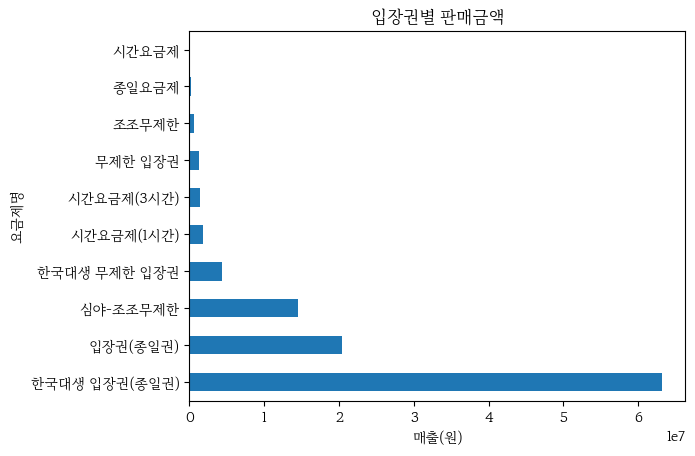

In [29]:
# 집계 결과 시각화하기
plan_total[:10].plot(kind='barh')
plt.xlabel('매출(원)')
plt.ylabel('요금제명')
plt.title('입장권별 판매금액',fontproperties=title_font)
plt.show()

#### 분석

- 한국대생 종일 입장권으로 인한 매출이 총 매출의 대부분임을 알 수 있습니다.  
- 종일권과 무제한 요금제의 매출이 전체 매출의 많은 부분을 차지하고 있음을 알 수 있습니다.
-------------------------------------

## 5. 나만의 문제 설정

### 1) VIP 고객 분석

1. sales_data와 entry_data의 '고객'열을 뽑아냅니다.
2. '고객' 열에서 고유 번호 6자리만 남겨 슬라이싱 합니다.
3. unique한 고객넘버의 개수를 알아냅니다.

In [30]:
sale_data_customer = tmp_sales
entry_data_customer = entry_data
sale_data_customer['고객'] = tmp_sales['고객'].str[-6:]
entry_data_customer['고객'] = entry_data['고객'].str[-6:]
entry_data_customer
# print(entry_data_customer)

# idx1 = entry_data_customer[entry_data_customer['고객'] == ''].index 
# entry_data_customer.drop(idx1, inplace=True) 
# entry_data_customer = entry_data_customer['고객'] != ''
sale_data_customer['고객'].isnull().sum()
entry_data_customer['고객'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
22550    False
22551    False
22552    False
22553    False
22554    False
Name: 고객, Length: 22555, dtype: bool

고객의 고유번호만 떼 내었습니다.  
isnull()로 결측치가 있는지 알아보고, 지불한 고객을 알 수 없을 경우는 분석하지 않습니다.


In [31]:
print(len(sale_data_customer['고객'].unique())) #상품 구매한 고유한 손님 수 파악
print(len(entry_data_customer['고객'].unique())) #요금 결제한 고유한 고객 수 파악

1973
5404


In [32]:
sale_data_customer_total = sale_data_customer['금액'].groupby([sale_data_customer['고객']]).sum().sort_values(ascending=False)
entry_data_customer_total = entry_data_customer['금액'].groupby([sale_data_customer['고객']]).sum().sort_values(ascending=False)

상품과 요금 총 결제액이 많은 고객 순으로 정렬했습니다.  
크로스탭을 통해서 고객의 class를 나누어 보고 싶었지만 시간이 모자랐습니다.

### 2) 결제 위치 분석

상품과 요금은 모두 카운터, 선불기1, 선불기2를 통해 이루어집니다.  
각각의 선불기에서 결제하는 목적을 살펴보았습니다.

In [33]:
print('=========================================================')
print('상품 결제 위치')
print('=========================================================')
tmp_sales_lo = tmp_sales['금액'].groupby(tmp_sales['위치']).sum()
print(tmp_sales_lo)
print('=========================================================')
print('요금 결제 위치')
print('=========================================================')
entry_data_lo = entry_data['금액'].groupby([entry_data['위치']]).sum()
print(entry_data_lo)
print('=========================================================')


상품 결제 위치
위치
선불기1    25743000
선불기2      896500
카운터      1098400
Name: 금액, dtype: int32
요금 결제 위치
위치
선불기1       983900
선불기2    124135300
카운터        254200
Name: 금액, dtype: int64


선불기 1에서는 대부분 상품의 결제가 이루어지며,  
선불기 2에서는 대부분 요금의 결제가 이루어지고 있습니다.

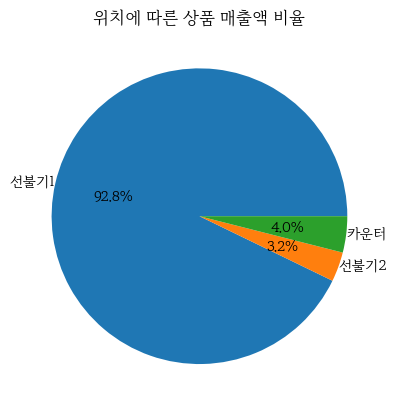

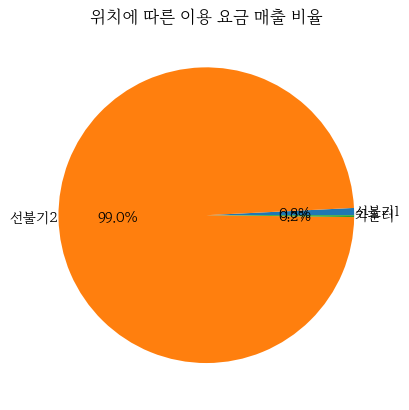

In [34]:
# 집계 결과  시각화하기
pie2 = ["선불기1", "선불기2", "카운터"]
pie_values2 = [25743000, 896500, 1098400]
plt.pie(pie_values2,labels=pie2,labeldistance=1,autopct='%.1f%%')
# plt.legend(pie)
plt.title('위치에 따른 상품 매출액 비율',fontproperties=title_font)
plt.show()
pie_values3 = [983900, 124135300, 254200]
plt.pie(pie_values3,labels=pie2,labeldistance=1,autopct='%.1f%%')
# plt.legend(pie)
plt.title('위치에 따른 이용 요금 매출 비율',fontproperties=title_font)
plt.show()

- 선불기1과 선불기2의 결제목적이 뚜렷하게 나뉘어지는 것을 확인할 수 있습니다.
---------------------------------------------------

## 6. 전략 수립 및 실행


- 사람들이 가장 많이 사용하는 요금제가 한국대생의 요금제였습니다. 월별 매출 추세에서 매출이 낮았던 달의 원인이 학생들의 방학기간과 학기초이기 때문임을 추측해 볼 수 있습니다.  
   
- 학생들이 많이 이용하지 않는 기간에 프로모션을 진행해도 좋을 것 같습니다.   
- 현저히 판매율이 낮은 포장판매 상품은 원활한 재고관리를 위해 판매를 중단하여도 좋을 것 같습니다. 매출은 거의 없지만 보관이 냉동인 포장상품을은 효율이 좋지 못한 것 같습니다.   
- 선호하는 요금제와 비선호하는 요금제를 나누어 선불기1과 선불기2의 위치와 동선을 조정하고, 상품판매와 요금제 결제로 역할을 나누어 업무효율을 높일 수 있습니다.  
------------------------------------------------------------------------

## 7. 회고

- 데이터의 결손치를 보강을 완벽하게 하지 못한 것이 아쉽습니다.(판매액 0인 부분 다수 존재.) 값 하나하나를 다 살펴볼 수 없는 데이터를 여러가지 메서드를 통해 살펴보는 것을 배우게 되어 즐거웠습니다.  
데이터를 읽어오면 항상 info(), head()로 확인을 하고 결측치를 정리하는 등의 기본적인 공통 처리 과정을 좀 더 자연스럽게 하게 된 것 같습니다.

- 데이터를 분석할 때, 처음부터 너무 스코프를 좁게 하지말고 넓은 것부터 해야 문제도 정확하게 볼 수 있고 속도도 빠르다는 것을 알게 되었습니다. 원본 데이터를 보존한 채 가공할 데이터를 새로운 변수로 설정해서 분석을 해야 실수를 했을 때나 문제가 생겼을 때 수정하기 쉽다는 것을 느꼈습니다.  
실제로도 열의 이름을 공통으로 맞추거나, 문자열 정리를 할 때 원본 데이터에서 바로 수정을 한 경우가 있었는데 나중에 그 데이터를 다른 방향으로 가공해야 할 때 번거로움이 있었습니다.  

- 그래프에서 매출액을 나타내는 축의 값이 자연상수e로 표현되는 것이 아쉬웠습니다. 다음번에는 조금 더 읽기 쉽게 돈의 경우에는 부동소수점 표기법이 아닌, 단위에 따라 (만원), (원) 등으로 간추려 나타내고 싶습니다.  
- bar horizental 그래프에서, 수치가 가장 큰 막대를 위로 가게 하고 싶었습니다. 인덱스 자체를 역으로 만들어 그래프를 그리는 방법을 보았는데 도중에 어려워서 다 해보지 못했습니다.  

- 정확한 data의 의미를 알 수 없어서 오차가 많이 생기는 부분이 아쉬웠습니다.  

- 원래의 목표는 고객 관리 (VIP 분석), 결제 위치 분석, 이용하는 시간 분석을 하는 것이었지만 시간과 방법적인 한계로 다 하지 못했습니다. 특히 크로스탭을 적용해 VIP 고객을 더 분석해 보지 못한 점이 아쉬웠습니다.  고객 아이디를 일치시켜서 인덱스로 만들고, 다중 인덱스를 사용하는 방법도 활용해 보면 더욱 좋은 분석이 될 것 같습니다.  
- 같은 범주를 공유하는 비교에서 그래프를 subplot()으로 여러개 한번에 그려보고 싶었지만 시간이 모자라서 아쉬웠습니다.
----------------------------------------------

## 8. References  
https://doong-e.tistory.com/27 (결측치 행을 찾기)  
https://sorting.tistory.com/16  (데이터프레임 필터링)  
https://blog.naver.com/nilsine11202/221667433984 (조건을 만족하는 행 삭제)    
https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html (Matplotlib 서브플랏 활용법)  
